# Interoperability, or making things speak to each other
## Or, turning everything into numbers

In this studio, we're going to play around with some functions of interoperability - or, explore different data structures and how to make them connect up. 

I find this kind of data science really frustrating (even though I work in data visualization), because it is really unintiuitive. It requires a *weird* kind of imagining, so if you feel like you're losing your footing, don't worry, you're not alone. It's vertiginous!

But, it means that we get to roll together some of the ideas we learnt about in our Tables studio, and our Algorithms studio, and prepare for our Images studio in a few weeks time. 

### We need a big dataset. So let's scrape Reddit using their API.
(thanks to parth bhardwaj for the walkthrough)

> an API or Application Programming Interface allows you to talk directly to the website with permission, rather than dragging information out of the HTML (which is important to know how to do too!)

Sign in to reddit using Google Chrome in a separate tab.

Then go to this page: https://www.reddit.com/prefs/apps

Click **create app**

![create app](https://miro.medium.com/max/2400/1*I06ZUKgMjooh2hFopGrqjQ.png)

In the form that will open, you should enter your name, description and uri. For the redirect uri you should choose http://localhost:8080

![redirect uri](https://miro.medium.com/max/2400/1*SrohBPmEox1R9Qdp0K8Z6w.jpeg)

Now, let's do some python! PRAW is the Reddit API. And pandas are our old dataframe friends.  

## pip install from python

So before we use PRAW, we need to install the python package on our computer. If you need to `pip install`, you can do this in several ways: writing `pip install your-package` in your terminal command line; or doing it straight from Jupyter Notebook or JupyterHub. 

> I've noted before, if you're going to install Jupyter Notebooks, I highly recommend using the Anaconda Graphical Installer: https://www.anaconda.com/products/individual: 

Because we're cool and avant garde, we're going to do it straight from our JupyterHub notebooks, which is in proof of concept mode!

In [1]:
!pip install praw

Now, let's import our packages and set up our API connection. You need to fill out your own ID details!

![](https://cs205uiuc.github.io/guidebook/python/reddit-creds.png)

In [2]:
import praw
import pandas as pd

reddit = praw.Reddit(client_id="bst9HmJXayXZFw",      # your client id
                     client_secret="Iq1bwbLIaowB25CY-v6F1qPMLIBuIA",  #your client secret
                     user_agent="android:com.example.myredditapp:v1.2.3 (by u/Glass_Relationship_3)", #user agent name
                     username = "Glass_Relationship_3",     # your reddit username
                     password = "studios9876")     # your reddit password

print(reddit)

Version 7.1.0 of praw is outdated. Version 7.1.2 was released 23 hours ago.


Now, let's scrape our subreddit. In the `sub` section you can choose your subreddit, and then use `query` to run a search term.  

At the end we'll convert it into a panda data frame called "post_data" which we will use for later gymnastics, and save it to CSV for good measure. 

In [25]:
sub = ['berkeley'] # your subreddit

for s in sub:
    
    subreddit = reddit.subreddit(s)
    query = ['covid']
 
    for item in query:
        posts = {
            "title" : [],   #title of the post
            "score" : [],   # score of the post
            "id" : [],      # unique id of the post
            "url" : [],     #url of the post
            "comms_num": [],   #the number of comments on the post
            "created" : [],  #timestamp of the post
            "upvote_ratio" : [],         # the description of post
            "body" : [] #the body of the post
        }
        for submission in subreddit.search(query,sort = "top",limit = 1000): #max 1k
            posts["title"].append(submission.title)
            posts["score"].append(submission.score)
            posts["id"].append(submission.id)
            posts["url"].append(submission.url)
            posts["comms_num"].append(submission.num_comments)
            posts["created"].append(submission.created_utc)
            posts["upvote_ratio"].append(submission.upvote_ratio)
            posts["body"].append(submission.selftext)
        

        post_data = pd.DataFrame(posts)
        post_data.to_csv(s+"_"+ item +"subreddit.csv")

print(subreddit)

berkeley


For more info on the parameters you can request for a submission, see: http://lira.no-ip.org:8080/doc/praw-doc/html/code_overview/models/submission.html

## Finding numbers in data

This next section, we're going to get used to different computational types and how they work together.

Let's see what our post_data from Reddit looks like:

In [29]:
post_data.head()

,title,score,id,url,comms_num,created,upvote_ratio,body
0,Nick's Covid Advice for CS161: Prepare to go t...,1330,jtk06n,https://www.reddit.com/r/berkeley/comments/jtk...,165,1.605288e+09,0.98,(Mirroring from my CS161 piazza post)\n\n\nAs ...
1,Serious rant from an incoming international st...,954,hmkg5c,https://www.reddit.com/r/berkeley/comments/hmk...,79,1.594083e+09,0.98,"Just about a couple hours ago, the ICE(US Immi..."
2,Why I Think Fall will be On-Line Only (Nick We...,798,g9vxb0,https://www.reddit.com/r/berkeley/comments/g9v...,105,1.588109e+09,0.98,"I posted this to the class Piazza, but I reali..."
3,"For those who continue to gather, some of us h...",566,l9vs0r,https://www.reddit.com/r/berkeley/comments/l9v...,33,1.612157e+09,0.97,My mom kicked me out of the house in December ...
4,"To students partying, fuck you. - An Internati...",525,lc2n9u,https://www.reddit.com/r/berkeley/comments/lc2...,76,1.612398e+09,0.95,"Having someone to take care of you, IS A PRIVI..."


Different data types have different properties which allow them to do things, or not do things. For instance, you can't plot a character on a graph.

In Python, these are the main data types (thanks to Shawn Ren for the graph):
![](https://miro.medium.com/max/700/1*QfI8H_8HplGa1v9IrrWjBA.png) 

So, let's check out the data types of our `post_data` data set:

In [27]:
print(post_data.dtypes)

title            object
score             int64
id               object
url              object
comms_num         int64
created         float64
upvote_ratio    float64
body             object
dtype: object


We're seeing a lot of Python/Panda objects (because this is a dataframe, and which we will need to convert to use), but also some integers and floating points, which are numeric forms. This is awesome! 

So, let's try plotting some data. Most digital images are Cartesian (like maps!), meaning that they work on an x,y axis, where each pixel is assigned an x,y coordinate. This coordinate system, called algebraic geometry, combines spatial measurement forms with numeric forms.

![](https://images.deepai.org/glossary-terms/7d0273fdc6cc42aca2fbdd72b61a4499/cartesian.png)

So, you can set any of the int64 or float74 values against each other:

Text(0, 0.5, 'number of comments')

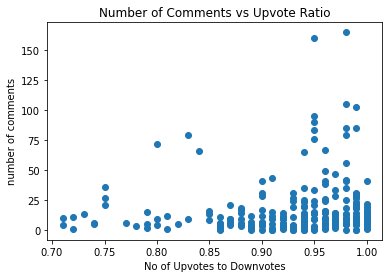

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# scatter the comments against the likes
ax.scatter(post_data['upvote_ratio'], post_data['comms_num']) #format (dataframe1(column), dataframe2(column))
# set a title and labels
ax.set_title('Number of Comments vs Upvote Ratio')
ax.set_xlabel('No of Upvotes to Downvotes')
ax.set_ylabel('number of comments')

Okay, cool. But what about the time of the post. Take a look at the "created" column - this is a time stamp in Unix time, which is a universal time that is free from timezones:

> Unix time (a.k.a. POSIX time or Epoch time) is a system for describing instants in time, defined as the number of seconds that have elapsed since 00:00:00 Coordinated Universal Time (UTC), Thursday, 1 January 1970, not counting leap seconds. It is used widely in Unix-like and many other operating systems and file formats. Due to its handling of leap seconds, it is neither a linear representation of time nor a true representation of UTC. 

We're going to need to bring that into something readable to humans! So, let's convert it, and make sure that it's in a `datetime` format and that it looks about right to the human eye:

In [32]:
post_data["created"]= pd.to_datetime(post_data["created"], yearfirst=True, unit="s")
print(post_data.dtypes)
post_data.head()

title                   object
score                    int64
id                      object
url                     object
comms_num                int64
created         datetime64[ns]
upvote_ratio           float64
body                    object
dtype: object


,title,score,id,url,comms_num,created,upvote_ratio,body
0,Nick's Covid Advice for CS161: Prepare to go t...,1330,jtk06n,https://www.reddit.com/r/berkeley/comments/jtk...,165,2020-11-13 17:27:06,0.98,(Mirroring from my CS161 piazza post)\n\n\nAs ...
1,Serious rant from an incoming international st...,954,hmkg5c,https://www.reddit.com/r/berkeley/comments/hmk...,79,2020-07-07 00:48:54,0.98,"Just about a couple hours ago, the ICE(US Immi..."
2,Why I Think Fall will be On-Line Only (Nick We...,798,g9vxb0,https://www.reddit.com/r/berkeley/comments/g9v...,105,2020-04-28 21:21:40,0.98,"I posted this to the class Piazza, but I reali..."
3,"For those who continue to gather, some of us h...",566,l9vs0r,https://www.reddit.com/r/berkeley/comments/l9v...,33,2021-02-01 05:27:35,0.97,My mom kicked me out of the house in December ...
4,"To students partying, fuck you. - An Internati...",525,lc2n9u,https://www.reddit.com/r/berkeley/comments/lc2...,76,2021-02-04 00:21:27,0.95,"Having someone to take care of you, IS A PRIVI..."


In [ ]:
Now, let's plot the date compared to the number of comments?

Text(0, 0.5, 'Number of Comments on Posts')

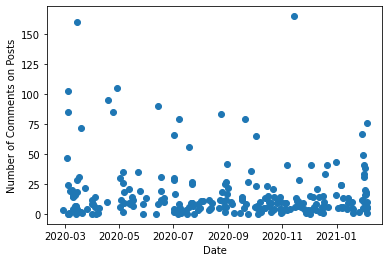

In [38]:
fig, ax = plt.subplots()

# scatter the comments against the likes
ax.scatter(post_data['created'], post_data['comms_num'])
# set a title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Number of Comments on Posts')

So, we've been using the useful and classic `matplotlib` to do our graphics. But it's not really the best. Let's try another and see if we can get some more information. Let's use `plotly`

In [39]:
!pip install plotly==4.14.3

In [41]:
import plotly.express as px

fig = px.scatter(post_data, x="created", y="upvote_ratio", size="comms_num", color="score", hover_name="title", size_max=60)
fig.show()

I'm not going to bore you with more graphs - but when you're feeling up to it, feel free to take a look at the different kinds of charts you can make and have a play around - you could even combine several reddit datasets!

https://plotly.com/python/

## Turning words into numbers

Now, let's look a little more closely at some text analysis and see what we can do!

Text works as a `str` or string: 

![](https://csharpcorner.azureedge.net/article/learn-about-strings-in-python/Images/Capture.PNG)

A word is a string of individual letters, a sentence is a string of words!

(Strings are used a lot in the Digital Humanities and Text Processing - I'm a geographer, and still learning about strings, so bear with me!)

Let's start by grabbing a cell with an object from our `post_data` dataset. With a `pandas` data frame, everything works on a gridded position as well! You can use `iloc` (or location by position) to find particular cells. Let's start with row number 3:

In [44]:
post_data.iloc[3] 

title           For those who continue to gather, some of us h...
score                                                         566
id                                                         l9vs0r
url             https://www.reddit.com/r/berkeley/comments/l9v...
comms_num                                                      33
created                                       2021-02-01 05:27:35
upvote_ratio                                                 0.97
body            My mom kicked me out of the house in December ...
date                                          2021-02-01 00:00:00
time                                                     05:27:35
Name: 3, dtype: object

Now, if you count down the list, body is number "7", so let's add that to get the cell.

In [45]:
post_data.iloc[3,7] 

'My mom kicked me out of the house in December and told me to "go kill myself" because she didn\'t want to take care of me anymore. My dad\'s been dead for years now. I had to beg a friend to let me stay with him until I could figure things out, and I just moved back to Berkeley so I can work my part-time job and pay for a room to live.\n\nIf you contract COVID, continue to disobey restrictions, and for example, infect me by coming into where I work, I can\'t work for weeks if I test positive. I don\'t have money left. I can\'t afford not to work at this point.\n\nPlease recognize your privilege. Some of you have a home to return to or have the resources to stay here if you test positive for COVID. I don\'t. I don\'t have anywhere else I can go but here. I recognize my privilege in having most of my first year in-person and not online, and it\'s probably frustrating for those who worked so hard to get here, but have to wait to experience what college is really like. I\'m sorry, but ple

Now, let's convert it from a panda object to a string, and give it a name, so we can do some analysis:

In [51]:
cell = str(post_data.iloc[3,7])
print(cell)

My mom kicked me out of the house in December and told me to "go kill myself" because she didn't want to take care of me anymore. My dad's been dead for years now. I had to beg a friend to let me stay with him until I could figure things out, and I just moved back to Berkeley so I can work my part-time job and pay for a room to live.

If you contract COVID, continue to disobey restrictions, and for example, infect me by coming into where I work, I can't work for weeks if I test positive. I don't have money left. I can't afford not to work at this point.

Please recognize your privilege. Some of you have a home to return to or have the resources to stay here if you test positive for COVID. I don't. I don't have anywhere else I can go but here. I recognize my privilege in having most of my first year in-person and not online, and it's probably frustrating for those who worked so hard to get here, but have to wait to experience what college is really like. I'm sorry, but please don't be c

We can count how many characters are in the string:

In [55]:
len(cell) #len = length

1076

Or what the 'n' letter of the string is (in the below example, 545th)

In [57]:
cell[545]

'a'

### Counting words

If we wanted to be braver, we could even try to count the most common words all the posts in the "title" column:

In [66]:
from collections import Counter
Counter(" ".join(post_data["title"]).split()).most_common(20)

[('to', 53),
 ('the', 44),
 ('a', 42),
 ('for', 41),
 ('COVID-19', 40),
 ('of', 36),
 ('in', 34),
 ('Berkeley', 34),
 ('and', 28),
 ('on', 24),
 ('I', 20),
 ('is', 18),
 ('from', 15),
 ('at', 15),
 ('UC', 15),
 ('COVID', 14),
 ('with', 13),
 ('The', 12),
 ('about', 11),
 ('have', 10)]

So, there are many "to", "the", "of" .... These are called "stopwords". Let's create a new column with all the stopwords deleted so we can count again. 

To do this we import an nltk dictionary which has a list of words. 


In [67]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clancywilmott/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Then we delete the stopwords from the title column and make a new column without the stopwords.

In [70]:
post_data['title_without_stopwords'] = post_data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
post_data.head()

,title,score,id,url,comms_num,created,upvote_ratio,body,date,time,title_without_stopwords
0,Nick's Covid Advice for CS161: Prepare to go t...,1330,jtk06n,https://www.reddit.com/r/berkeley/comments/jtk...,165,2020-11-13 17:27:06,0.98,(Mirroring from my CS161 piazza post)\n\n\nAs ...,2020-11-13,17:27:06,Nick's Covid Advice CS161: Prepare go ground
1,Serious rant from an incoming international st...,954,hmkg5c,https://www.reddit.com/r/berkeley/comments/hmk...,79,2020-07-07 00:48:54,0.98,"Just about a couple hours ago, the ICE(US Immi...",2020-07-07,00:48:54,Serious rant incoming international student cal
2,Why I Think Fall will be On-Line Only (Nick We...,798,g9vxb0,https://www.reddit.com/r/berkeley/comments/g9v...,105,2020-04-28 21:21:40,0.98,"I posted this to the class Piazza, but I reali...",2020-04-28,21:21:40,Why I Think Fall On-Line Only (Nick Weaver)
3,"For those who continue to gather, some of us h...",566,l9vs0r,https://www.reddit.com/r/berkeley/comments/l9v...,33,2021-02-01 05:27:35,0.97,My mom kicked me out of the house in December ...,2021-02-01,05:27:35,"For continue gather, us nowhere else go."
4,"To students partying, fuck you. - An Internati...",525,lc2n9u,https://www.reddit.com/r/berkeley/comments/lc2...,76,2021-02-04 00:21:27,0.95,"Having someone to take care of you, IS A PRIVI...",2021-02-04,00:21:27,"To students partying, fuck you. - An Internati..."


And try again...

In [75]:
Counter(" ".join(post_data["title_without_stopwords"]).split()).most_common(20)

[('COVID-19', 40),
 ('Berkeley', 34),
 ('I', 20),
 ('UC', 15),
 ('COVID', 14),
 ('The', 12),
 ('campus', 10),
 ('Covid', 9),
 ('Fall', 8),
 ('Cal', 7),
 ('online', 6),
 ('Anyone', 6),
 ('covid', 6),
 ('experience', 6),
 ('-', 5),
 ('semester', 5),
 ('fall', 5),
 ('tested', 5),
 ('positive', 5),
 ('What', 5)]

Well done! 

(as a bonus, you could turn this into a data frame if you wanted, and plot it as well! - though it's not a super interesting graph!) 

In [79]:
from pandas import DataFrame
words_num = Counter(" ".join(post_data["title_without_stopwords"]).split()).most_common(20)
words_num_df = pd.DataFrame(words_num,columns=['word','count'])
fig = px.scatter(words_num_df, x="word", y="count", hover_name="word")
fig.show()

## Turning images into numbers (and grids!)

In the final section of thsi studio, we're going to use a mixture of `matplotlib` and another library `imageio` to examine how images work as computational data (and how they're all also secretly grids and numbers). 

First, let's import `imageio` (`matplotlib` is already imported above), and drag in an image:

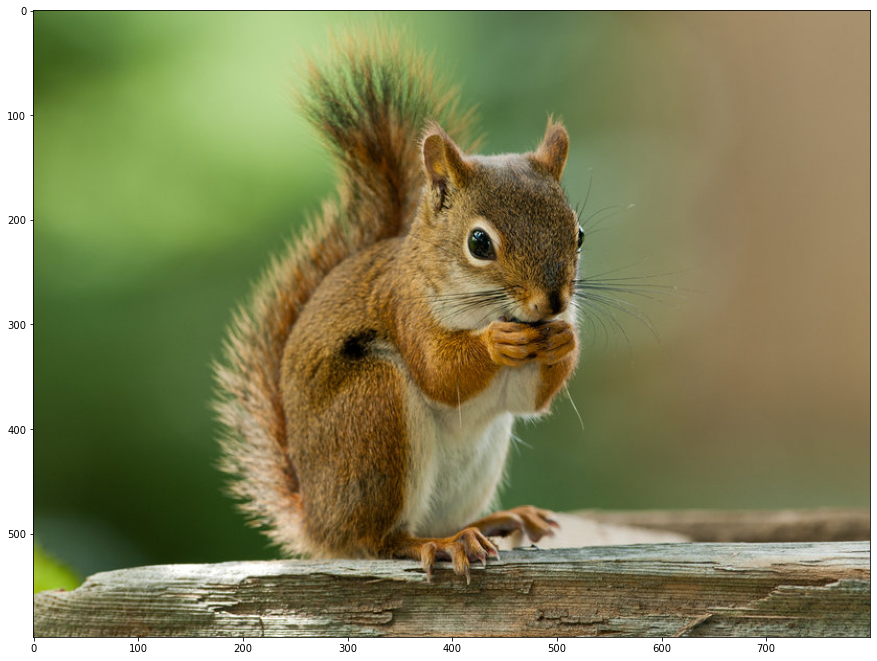

In [80]:
import imageio
#replace the link with the link to an image of your choice
pic = imageio.imread("https://media.npr.org/assets/img/2017/04/25/istock-115796521-fcf434f36d3d0865301cdcb9c996cfd80578ca99-s800-c85.jpg")
plt.figure(figsize = (15,15))

plt.imshow(pic)

All digital images look like this (thanks Stanford for the image): 

![](https://web.stanford.edu/class/cs101/image-diagram1.png)

Just like your graphs above, they have an `x` and `y` axis.

Each pixel is made up of three values: red (r), green (g) and blue (b):

![](https://web.stanford.edu/class/cs101/image-diagram2.png)

We will investigate this a little more in our image workshop, but for now, this provides us two ways of classifying (and so, searching through) the enormous data set that is an image: colour, and position. 

First, let's check that your image is in 3 dimensions (or RGB)

In [55]:
print('Dimension of Image {}'.format(pic.ndim))

Dimension of Image 3


Now, let's find the RGB value of a single pixel!

In [87]:
rgb = pic[100, 50]
print(rgb)

[113 147  63]


Can we split the layers so each image just shows the red, green and blue values?

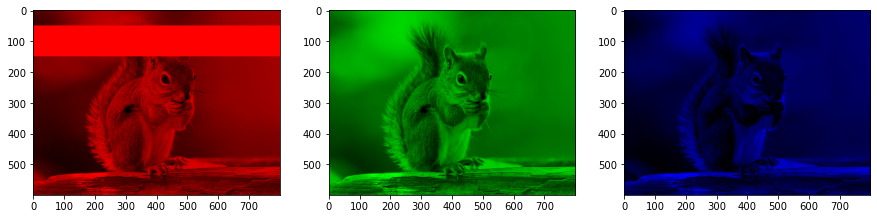

In [101]:
import numpy as np #thanks to Yassine Hamdaoui for the code
 
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype' by default: 'numpy.float64'  # assing each channel      
     split_img[ :, :, c] = pic[ :, :, c] # display each channel     
     ax.imshow(split_img)

What happens if we change the r value of the rows 50 to 150 to the full 255 intensity?

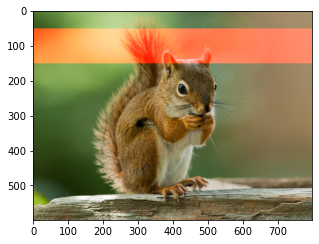

In [102]:
import matplotlib.pyplot as plt
    
pic[50:150 , : , 0] = 255 # full intensity to those pixel's R channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

And finally, let's just highlight only pixel values that are higher than 180 in the r channel!

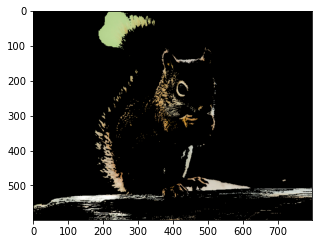

In [112]:
pic = imageio.imread("https://media.npr.org/assets/img/2017/04/25/istock-115796521-fcf434f36d3d0865301cdcb9c996cfd80578ca99-s800-c85.jpg")
red_mask = pic[:, :, 0] < 180
pic[red_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)

That's it for today! Don't forget to post your graph or image in the #studios slack channel